# Shop Sales Analysis Project

 ### Primary Questions:
 
    - Q: How much was earned in 2019? 
    - Q: What was the best month for sales? How much was earned that month?
    - Q: What City had the highest number of sales?
    - Q: What time should we display adverstisement to maximize 
    likelihood of customer's buying product? 
    - Q: What product sold the most? Why do you think it sold the most? 
    


# Data Features:

    - `Order ID` - An Order ID is the number system that Amazon uses exclusively to keep track of orders. Each order receives its own Order ID that will not be duplicated. This number can be useful to the seller when attempting to find out certain details about an order such as shipment date or status.
    - `Product` - The product that have been sold.  
    - `Quantity Ordered` - Ordered Quantity is the total item quantity ordered in the initial order (without any changes).
    - `Price Each` - The price of each products.
    - `Order Date` - This is the date the customer is requesting the order be shipped.
    - `Purchase Address` - The purchase order is prepared by the buyer, often through a purchasing department. The purchase order, or PO, usually includes a PO number, which is useful in matching shipments with purchases; a 
    - `shipping date`; billing address; shipping address; and the request items, quantities and price.​


## Data Importing

In [1]:
#import the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Import the raw datasets

jan_data = pd.read_csv("Sales_January_2019.csv")
feb_data = pd.read_csv("Sales_February_2019.csv")
march_data = pd.read_csv("Sales_March_2019.csv")
april_data = pd.read_csv("Sales_April_2019.csv")
may_data = pd.read_csv("Sales_May_2019.csv")
june_data = pd.read_csv("Sales_June_2019.csv")
july_data = pd.read_csv("Sales_July_2019.csv")
aug_data = pd.read_csv("Sales_August_2019.csv")
sep_data = pd.read_csv("Sales_September_2019.csv")
oct_data = pd.read_csv("Sales_October_2019.csv")
nov_data = pd.read_csv("Sales_November_2019.csv")
dec_data = pd.read_csv("Sales_December_2019.csv")


## Data Wrangling

In [3]:
#Using Concatenate() function to merge all these datasets horizontally

df = pd.concat([jan_data, feb_data, march_data, april_data, may_data,june_data,july_data,aug_data,
               sep_data, oct_data, nov_data, dec_data])

In [4]:
#Making sure to convert the new large dataset into DataFrame to start my analysis

df = pd.DataFrame(df)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [5]:
#Since the NA values are 545 so the ratio is 545/186850 "We can eliminate them", as they don't have much weights on 
#the model we build

df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
# Drop NA values, and modify the Order ID column

df = df.dropna(how='all', inplace=False)
df.drop(df.loc[df['Order ID'] =='Order ID'].index.tolist(), axis=0,inplace=True)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182735 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          182735 non-null  object
 1   Product           182735 non-null  object
 2   Quantity Ordered  182735 non-null  object
 3   Price Each        182735 non-null  object
 4   Order Date        182735 non-null  object
 5   Purchase Address  182735 non-null  object
dtypes: object(6)
memory usage: 9.8+ MB


/tmp/ipykernel_62538/1934129921.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df.loc[df['Order ID'] =='Order ID'].index.tolist(), axis=0,inplace=True)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [7]:
#Convert these columns into their correct dtype

df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered']).astype(int)
df['Price Each'] = pd.to_numeric(df['Price Each']).astype(float)
df['Order Date'] = pd.to_datetime(df['Order Date'])

/tmp/ipykernel_62538/2503558553.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered']).astype(int)
/tmp/ipykernel_62538/2503558553.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Each'] = pd.to_numeric(df['Price Each']).astype(float)
/tmp/ipykernel_62538/2503558553.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [8]:
#Confirm everything works smoothly 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182735 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          182735 non-null  object        
 1   Product           182735 non-null  object        
 2   Quantity Ordered  182735 non-null  int64         
 3   Price Each        182735 non-null  float64       
 4   Order Date        182735 non-null  datetime64[ns]
 5   Purchase Address  182735 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.8+ MB


In [9]:
# Splitting the location primar location then the state and month

df["Consumer_Primary_Location"] = df['Purchase Address'].apply(lambda x: x.split(',')[0])
df["Consumer_State"] =  df['Purchase Address'].apply(lambda x: x.split(',')[1])
df['Month'] = df['Order Date'].dt.month

/tmp/ipykernel_62538/95539656.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Consumer_Primary_Location"] = df['Purchase Address'].apply(lambda x: x.split(',')[0])
/tmp/ipykernel_62538/95539656.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Consumer_State"] =  df['Purchase Address'].apply(lambda x: x.split(',')[1])
/tmp/ipykernel_62538/95539656.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

# Q1: How much was earned in 2019?

In [11]:
#Calculating the revenue "the earnings of 2019"

df['Revenue'] = df['Quantity Ordered'] * df['Price Each']

/tmp/ipykernel_62538/4220595851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Revenue'] = df['Quantity Ordered'] * df['Price Each']


In [28]:
round(df['Revenue'].sum(), 2)

33879779.77

In [12]:
#Checking the latest corrected Dataset

df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Consumer_Primary_Location,Consumer_State,Month,Revenue
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",944 Walnut St,Boston,1,700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",185 Maple St,Portland,1,14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",538 Adams St,San Francisco,1,23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",738 10th St,Los Angeles,1,149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",387 10th St,Austin,1,11.99
...,...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14 Madison St,San Francisco,12,14.95
25113,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",549 Willow St,Los Angeles,12,7.68
25114,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",273 Wilson St,Seattle,12,400.00
25115,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",778 River St,Dallas,12,11.99


In [13]:
#Creating sub-dataset from the original df to bring more analysis 

Consumer_Usage = df.groupby("Product")[ "Revenue"].sum().sort_values(ascending = False).to_frame(name = 'Total Profits').reset_index()

In [14]:
Consumer_Usage = pd.DataFrame(Consumer_Usage)
Consumer_Usage

,Product,Total Profits
0,Macbook Pro Laptop,7896500.00
1,iPhone,4712400.00
2,ThinkPad Laptop,4053959.46
3,Google Phone,3264000.00
4,27in 4K Gaming Monitor,2392198.66
5,34in Ultrawide Monitor,2308819.24
6,Apple Airpods Headphones,2307450.00
7,Flatscreen TV,1417200.00
8,Bose SoundSport Headphones,1323467.64
9,27in FHD Monitor,1114275.71


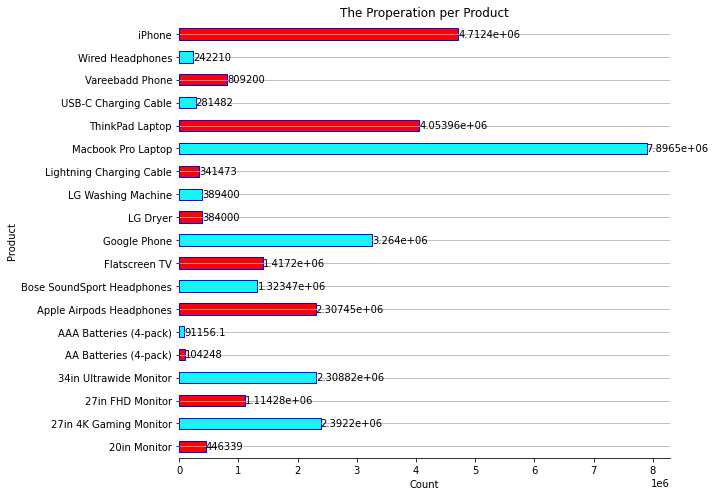

In [15]:
#We plot the barh plot based on the product and the revenue for each product

plt.figure(figsize = (30,30))
l = Consumer_Usage.groupby('Product')["Total Profits"].mean().plot.barh(figsize=(10,7),  color = ('red', 'cyan'), edgecolor='b')
plt.xlabel('Count')
plt.title('The Properation per Product')

l.bar_label(l.containers[0], label_type='edge')
plt.tight_layout()

l.spines['top'].set_visible(False)
l.spines['right'].set_visible(False)
l.spines['left'].set_visible(False)
l.grid(axis="y")

plt.show()


### Interpretation:

    - The first best seller is (Macbook Pro Laptop), followed by (Iphone). So both products it's not necessary to apply discounts upon.
    - In the second category, (ThinkPad) then (Google Phone) are considered most popular after Apple Products.
   

In [16]:
#Creating the most states that have the most revenue.

Usage_per_State = df.groupby(["Consumer_State","Month"])["Revenue"].sum().sort_values(ascending = False).to_frame(name = 'Total Revenue').reset_index()

In [17]:
Usage_per_State = pd.DataFrame(Usage_per_State)
Usage_per_State

,Consumer_State,Month,Total Revenue
0,San Francisco,12,1095074.98
1,San Francisco,10,850906.51
2,San Francisco,4,803979.43
3,San Francisco,5,766211.21
4,San Francisco,11,750491.50
...,...,...,...
103,Austin,8,124317.73
104,Portland,1,112876.66
105,Austin,2,107040.07
106,Austin,9,105836.76


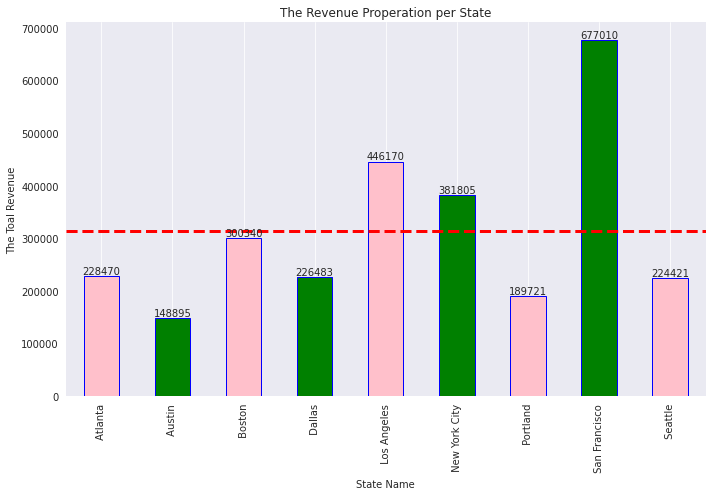

In [26]:
#Plotting the Revenue for each state then drawing the average revenue line.

plt.figure(figsize = (30,30))
m = Usage_per_State.groupby('Consumer_State')["Total Revenue"].mean().plot.bar(figsize=(10,7),  color = ('pink', 'green'), edgecolor='b')
plt.xlabel('State Name')
plt.ylabel('The Toal Revenue')
plt.title('The Revenue Properation per State')

m.bar_label(m.containers[0], label_type='edge')
plt.tight_layout()

m.spines['top'].set_visible(False)
m.spines['right'].set_visible(False)
m.spines['left'].set_visible(False)
m.grid(axis="y")

plt.axhline(Usage_per_State["Total Revenue"].mean(), color='red', linewidth=3, linestyle='--')

plt.show()


### The Interpretation:

    - The highest stated that recorded the highest revenue is San Fransico, followed by Los Angles, so based on that we might we consider opening more stores to connect more with our loyal clients. We might want to expand a little in these two areas by focusing on geomgraphic research such as retrieving the essential inforamtion of customers then we start building a personalised marketing campaigns.
    - Our average revenue is a little above 300k for 2019.
    

In [20]:
gg = df.groupby(["Consumer_State","Month"])["Revenue"].count().sort_values(ascending = False).to_frame(name = 'Total_Revenue').reset_index()

In [21]:
dada = pd.DataFrame(gg)
dada

,Consumer_State,Month,Total_Revenue
0,San Francisco,12,5946
1,San Francisco,10,4693
2,San Francisco,4,4371
3,San Francisco,11,4232
4,San Francisco,5,3856
...,...,...,...
103,Austin,9,653
104,Austin,8,639
105,Portland,1,615
106,Austin,2,608


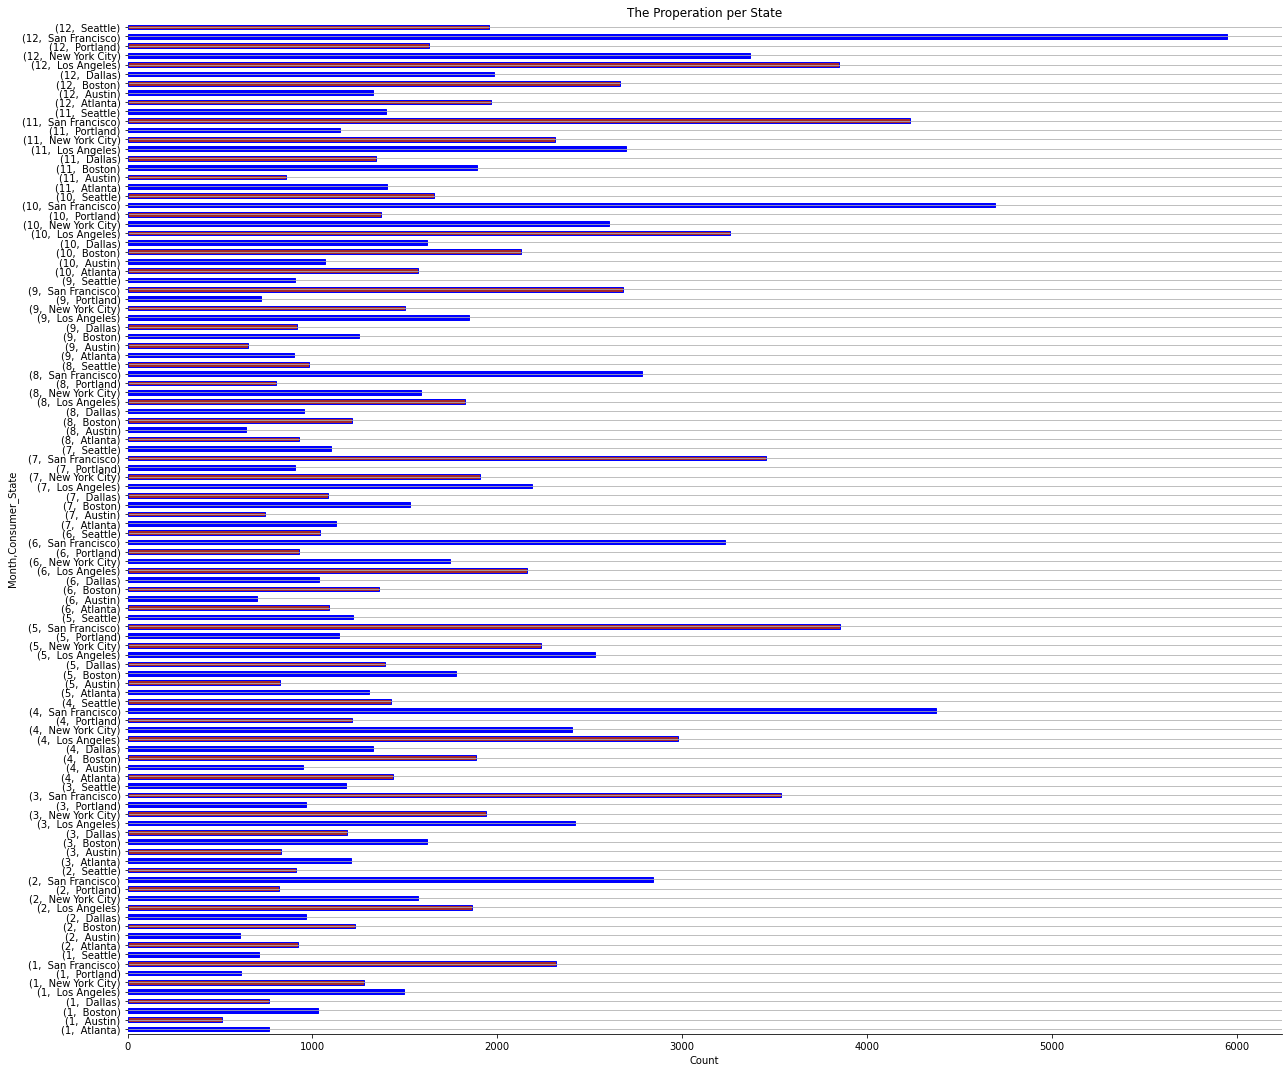

In [22]:


plt.figure(figsize = (80,80))
#m = dada.groupby("Month")["Total Revenue"].sum().plot.bar(figsize=(18,15),  color = ('pink', 'green'), edgecolor='b')
n = dada.groupby(["Month", 'Consumer_State'])["Total_Revenue"].sum().plot.barh(figsize=(18,15),  color = ('blue', 'brown'), edgecolor='b')


plt.xlabel('Count')
plt.title('The Properation per State')

n.bar_label(m.containers[0], label_type='edge')
plt.tight_layout()

n.spines['top'].set_visible(False)
n.spines['right'].set_visible(False)
n.spines['left'].set_visible(False)
n.grid(axis="y")

#plt.axhline(dada["Total Revenue"].mean(), color='red', linewidth=3, linestyle='--')

plt.show()


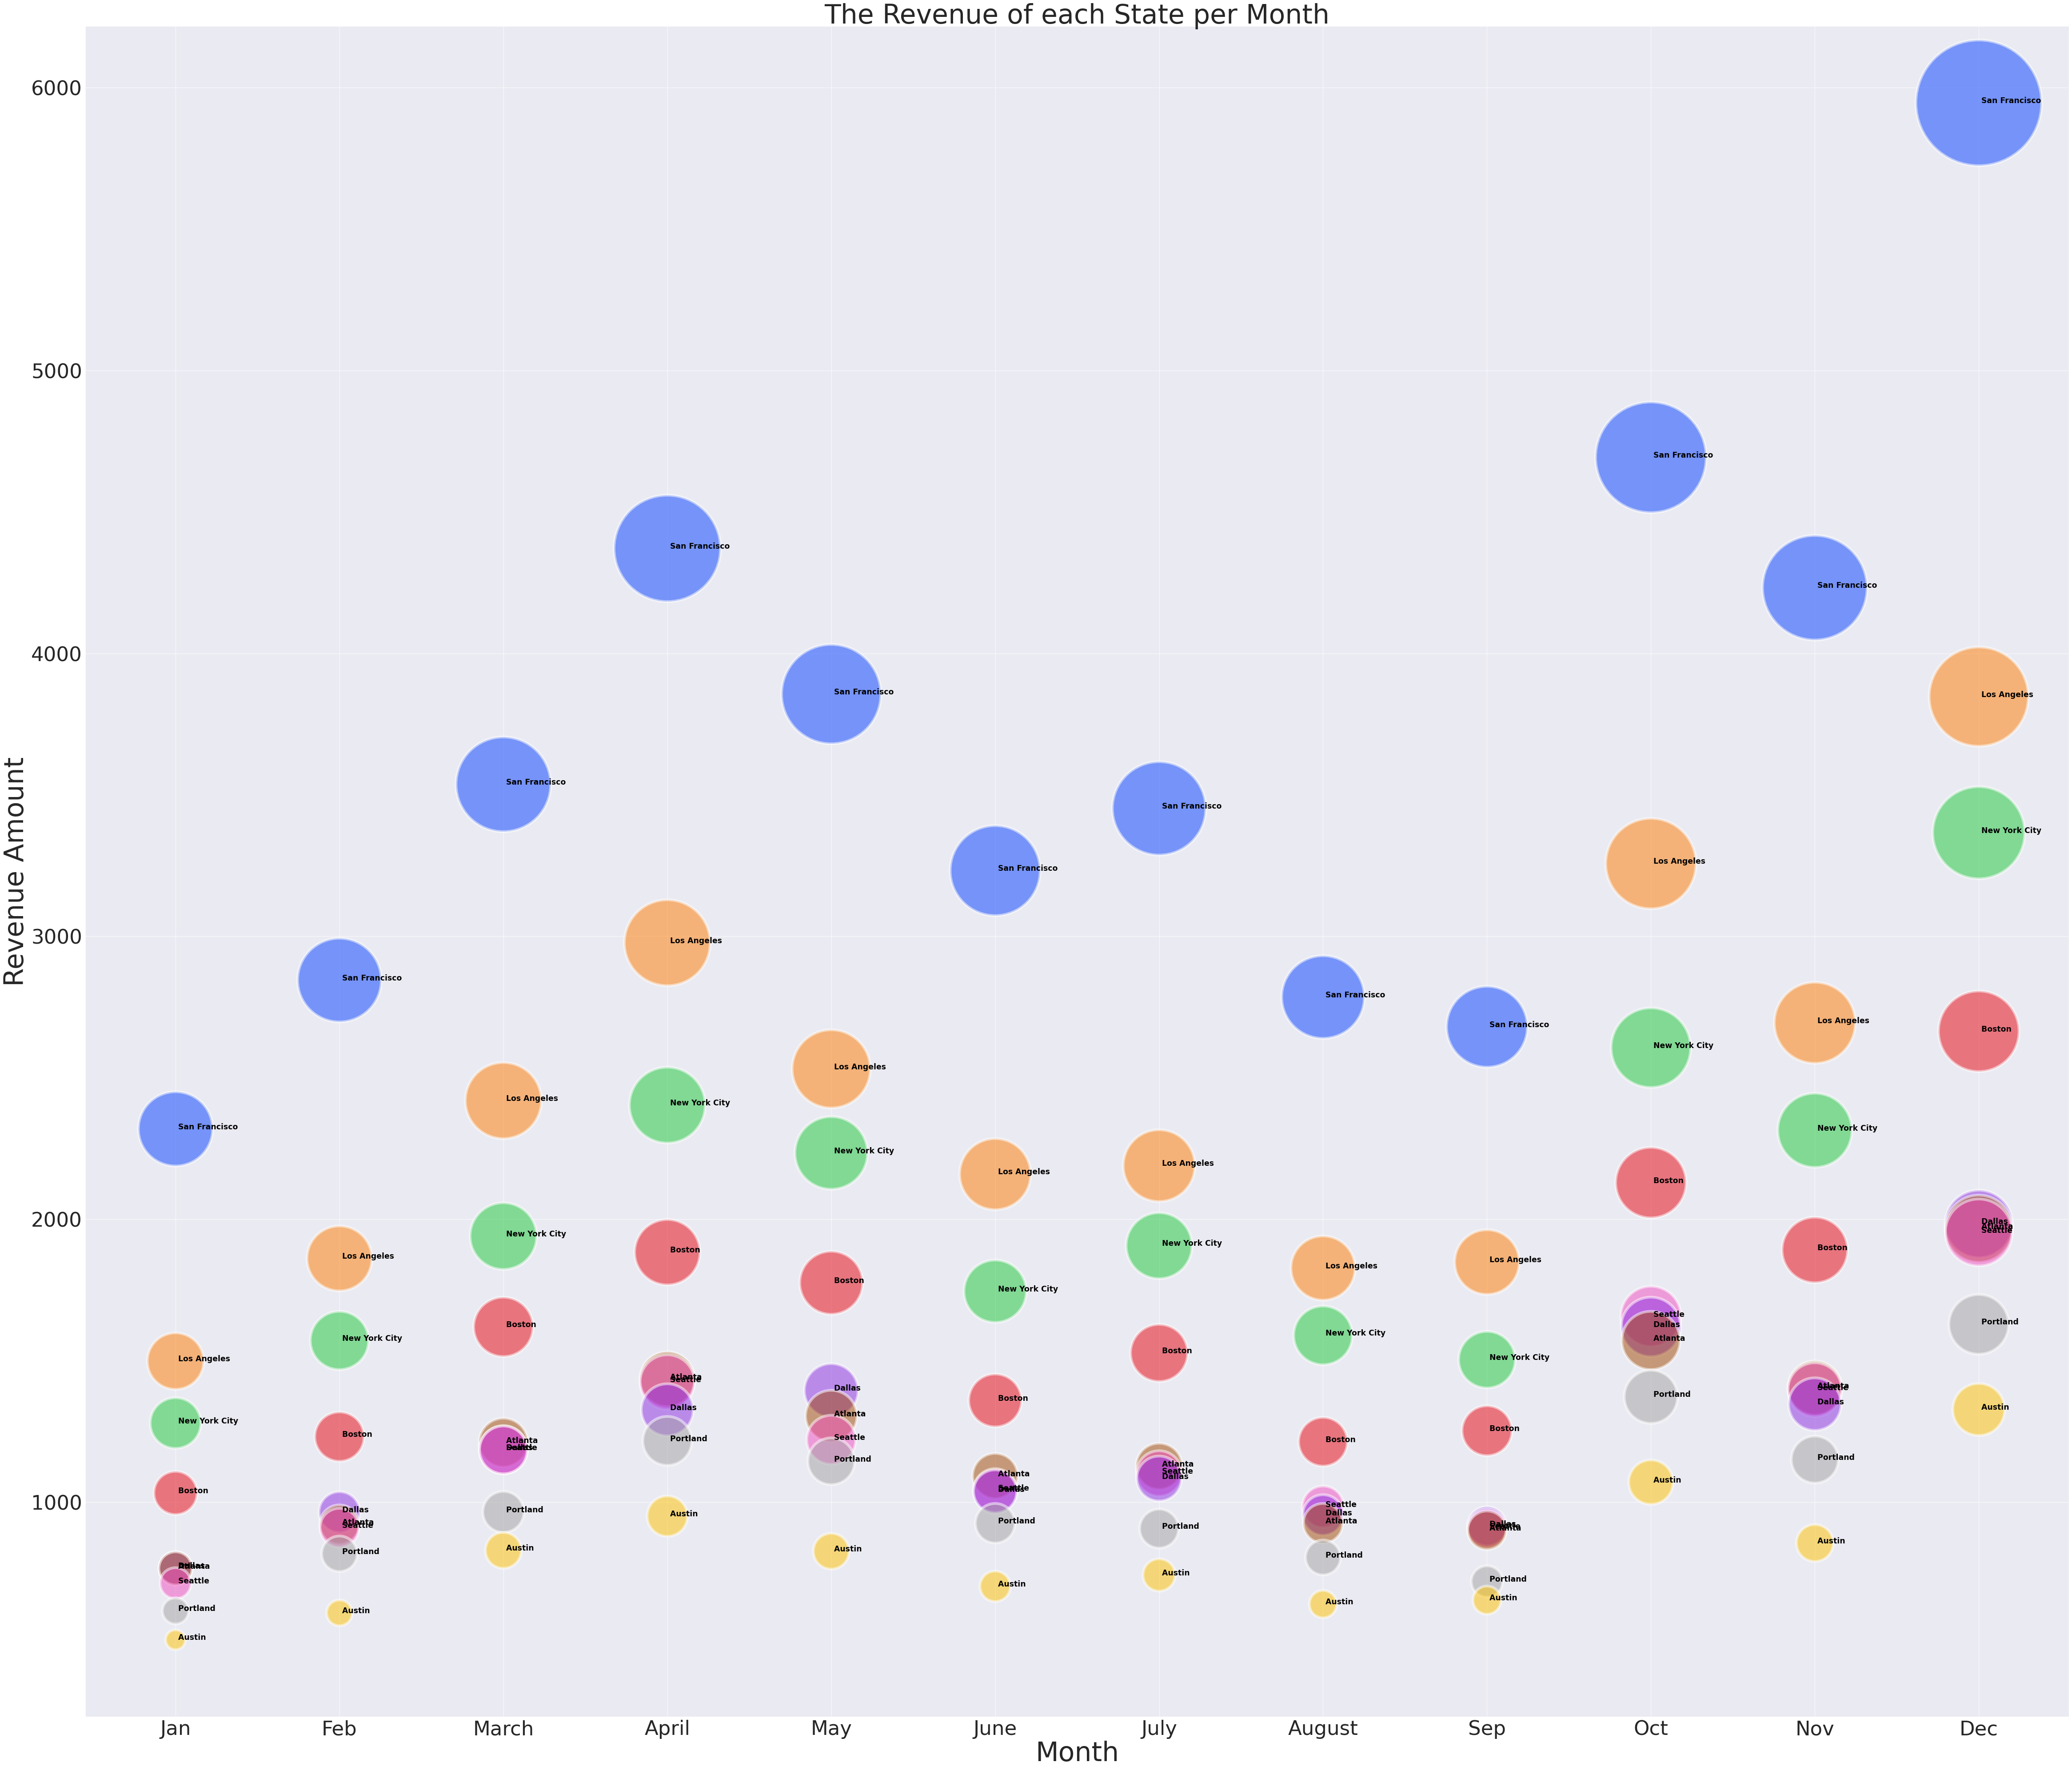

In [23]:
# set seaborn "whitegrid" theme
sns.set_style("darkgrid")


mme = ["Jan", "Feb", "March", "April", "May", "June", "July", "August", "Sep", "Oct", "Nov", "Dec"] 

plt.figure(figsize=(80,70))

kiki = dada["Total_Revenue"]*1000
# use the scatterplot function
ax = sns.scatterplot(data=dada, x="Month", y="Total_Revenue", size="Total_Revenue", hue='Consumer_State', 
                palette="bright", edgecolors="black", alpha=0.5, sizes=(2000,80000), legend = False)

# Add titles (main and on axis)
plt.xlabel("Month", fontsize = 60)
plt.ylabel("Revenue Amount", fontsize = 60)
plt.title("The Revenue of each State per Month", fontsize = 60)

#sns.set_xticklabels(mme)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], mme, fontsize = 45)
plt.yticks(fontsize = 45)


# Locate the legend outside of the plot

for line in range(0,dada.shape[0]):
     ax.text(dada.Month.iloc[line], dada.Total_Revenue.iloc[line], dada.Consumer_State.iloc[line], horizontalalignment='left', size='xx-large', color='black', weight='semibold')

#plt.legend(bbox_to_anchor=(1,1), loc='upper left', fontsize=40)

# show the graph
plt.show()


### The Interpretation:

    - I built up this chart as it has three different variables "Revenue" & "Month" & "Consumer State", we can see that the best state is San Fransco and the starting point of the revenue is higher than any other state, in general the revenue for each month for any other state starts from around 700 dollars, but when it comes to San Fransco it's close to 2300 dollars.
    - The best month we achieve high revenue is on December, October, and April. 

In [24]:
Product_Consumprtion = df.groupby(["Product", "Month"])[ "Revenue"].sum().sort_values(ascending = False).to_frame(name = 'Total_Profits').reset_index()
Product_Consumprtion


,Product,Month,Total_Profits
0,Macbook Pro Laptop,12,1081200.00
1,Macbook Pro Laptop,10,877200.00
2,Macbook Pro Laptop,5,782000.00
3,Macbook Pro Laptop,4,759900.00
4,Macbook Pro Laptop,11,732700.00
...,...,...,...
223,AAA Batteries (4-pack),8,5947.11
224,AAA Batteries (4-pack),2,5770.70
225,AAA Batteries (4-pack),9,5651.10
226,AA Batteries (4-pack),1,5368.32


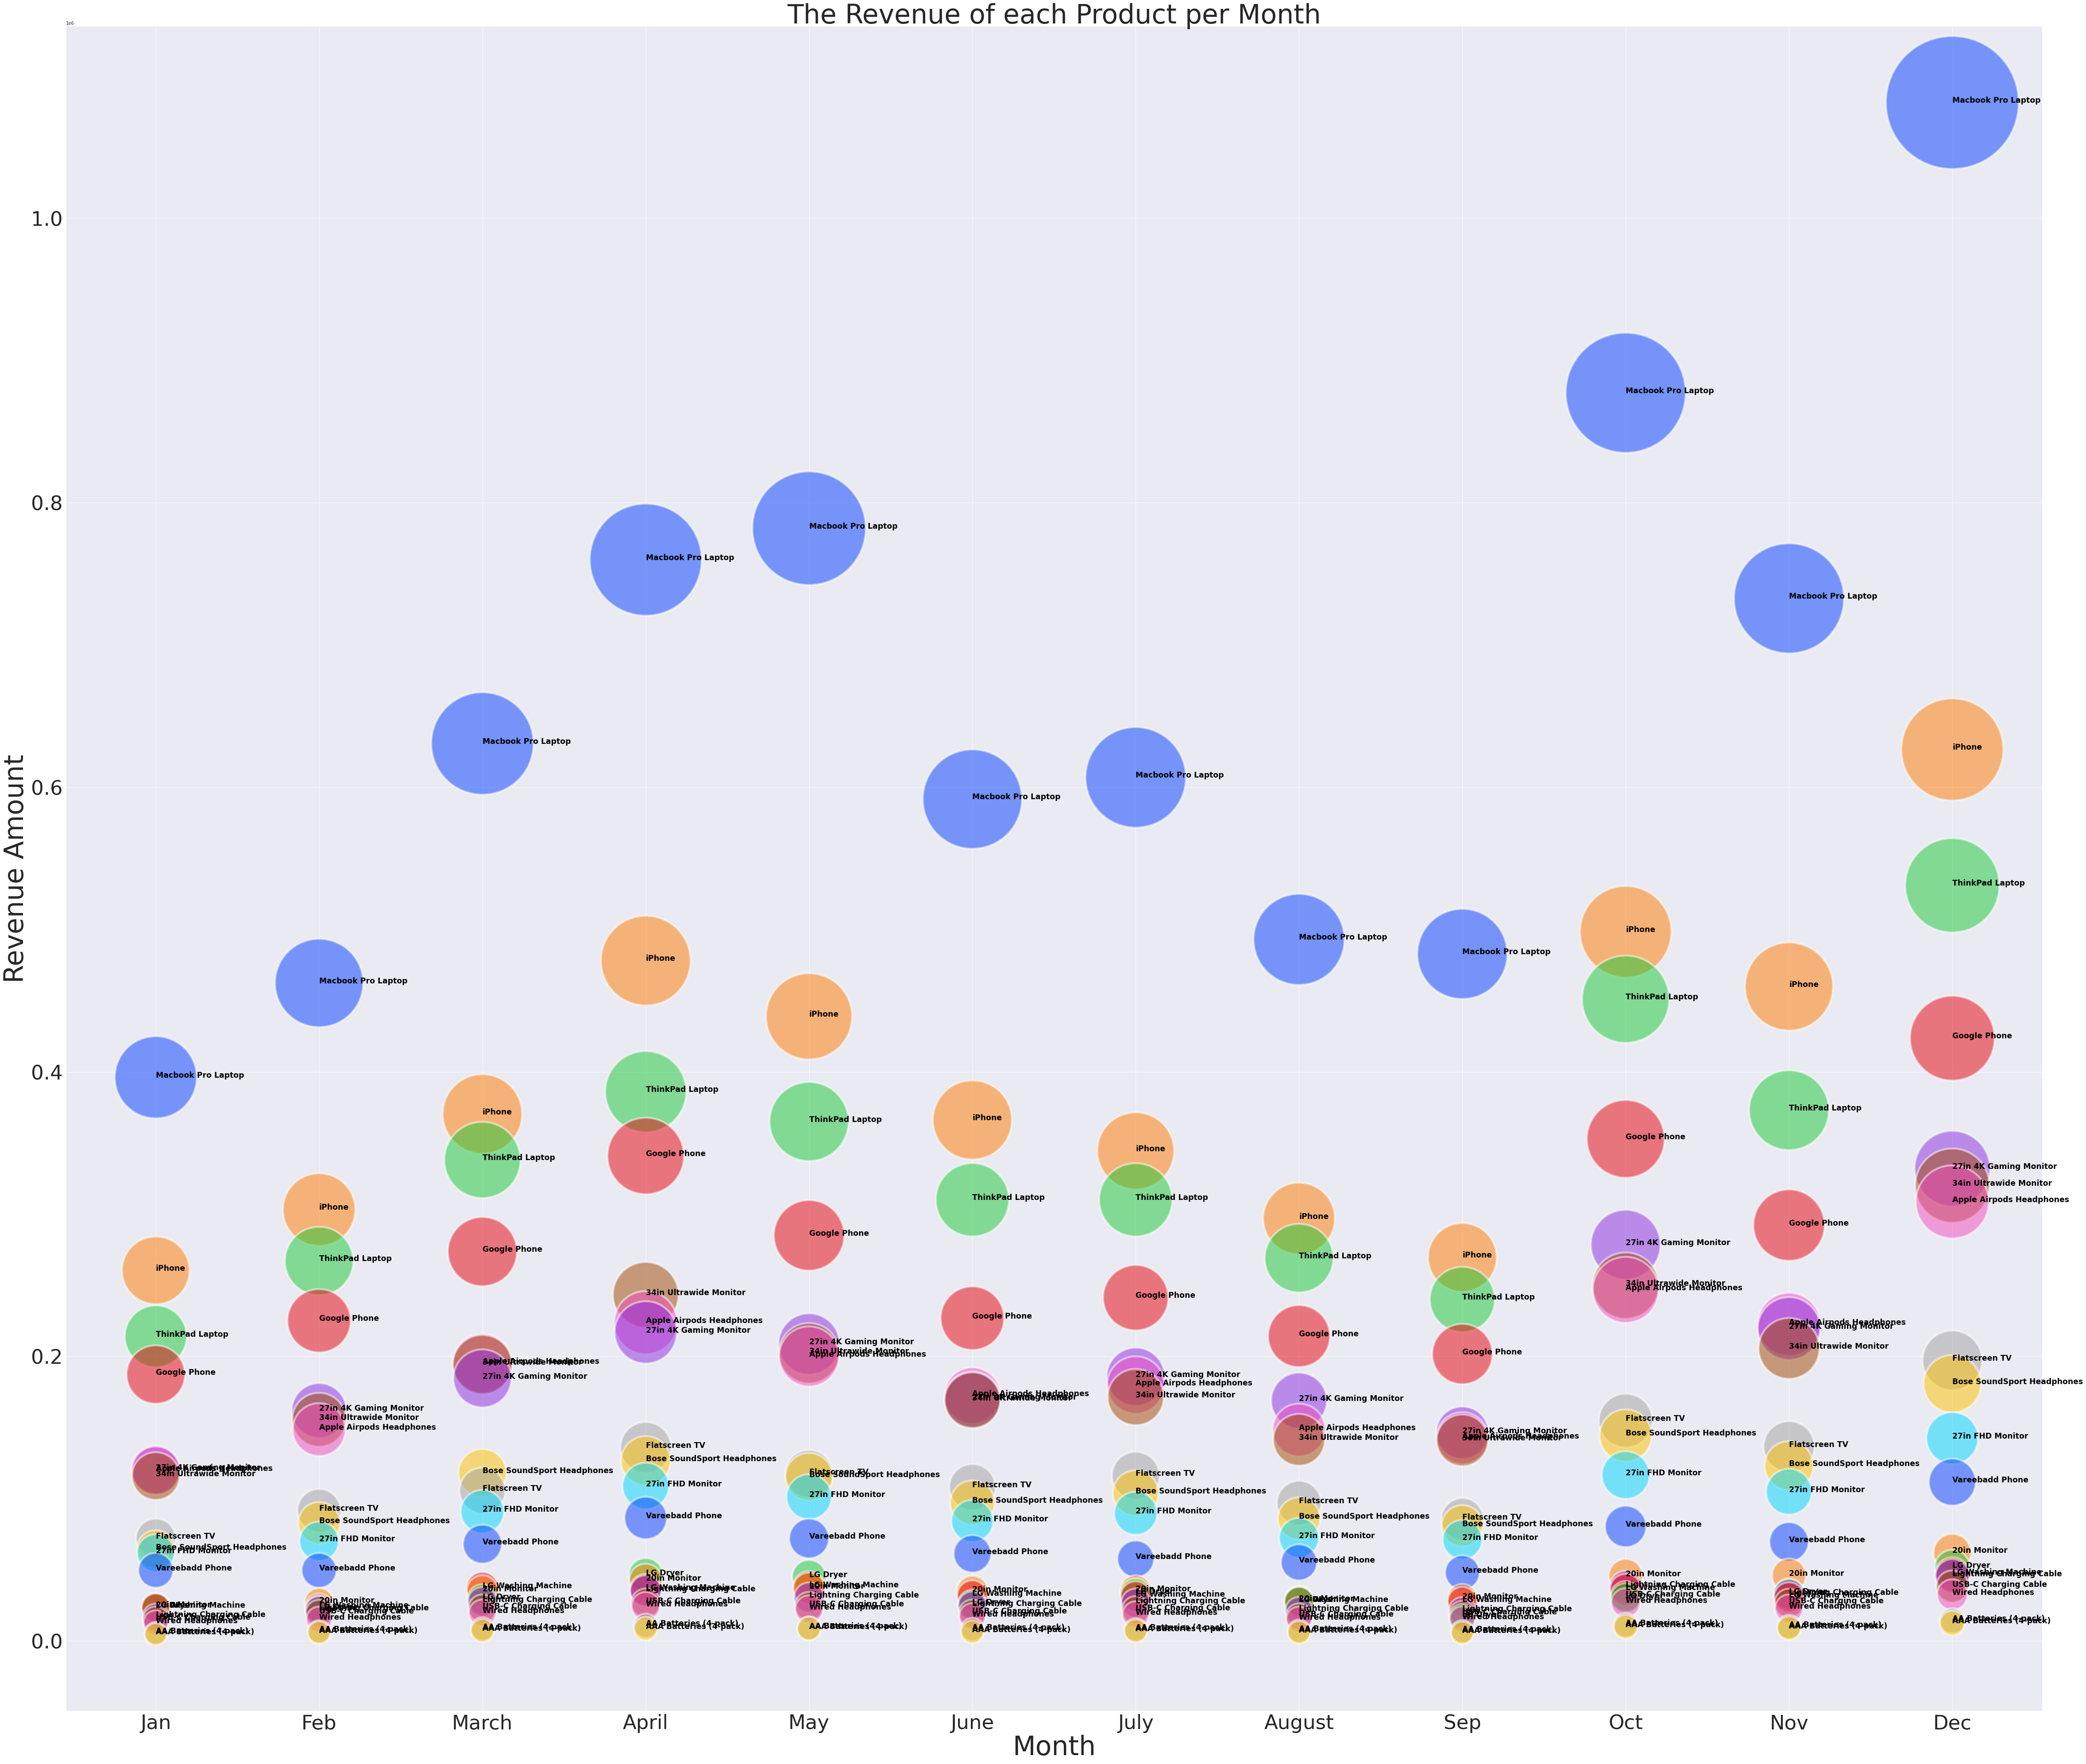

In [25]:
# set seaborn "whitegrid" theme
sns.set_style("darkgrid")


mme = ["Jan", "Feb", "March", "April", "May", "June", "July", "August", "Sep", "Oct", "Nov", "Dec"] 

plt.figure(figsize=(80,70))

# use the scatterplot function
ax = sns.scatterplot(data=Product_Consumprtion, x="Month", y="Total_Profits", size="Total_Profits", hue='Product', 
                palette="bright", edgecolors="black", alpha=0.5, sizes=(2500,90000), legend = False)

# Add titles (main and on axis)
plt.xlabel("Month", fontsize = 60)
plt.ylabel("Revenue Amount", fontsize = 60)
plt.title("The Revenue of each Product per Month", fontsize = 60)

#sns.set_xticklabels(mme)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], mme, fontsize = 45)
plt.yticks(fontsize = 45)


# Locate the legend outside of the plot

for line in range(0,Product_Consumprtion.shape[0]):
     ax.text(Product_Consumprtion.Month.iloc[line], Product_Consumprtion.Total_Profits.iloc[line], Product_Consumprtion.Product.iloc[line], horizontalalignment='left', size='xx-large', color='black', weight='semibold')

#plt.legend(bbox_to_anchor=(1,1), loc='upper left', fontsize=40)

# show the graph
plt.show()


# Conclusion:

    - I have covered the main questions asked, and here's the detailed answers:
    
        - Q: How much was earned in 2019?  At the end of 2019, the shop totall sales are 33879779.77 dollars.
            
        - Q: What was the best month for sales? How much was earned that month? December is 
            recorded as the best profitable month for 2019, witha total revenue equal to 677010 dollars.
       
        - Q: What City had the highest number of sales? The highest number os sales is in San Fransesco state.
            
        - Q: What time should we display adverstisement to maximize 
        likelihood of customer's buying product? The best time is December, then October, then April.
        
        - Q: What product sold the most? Why do you think it sold the most?  The top are Apple products 
            which are Macbook Pro Laptop, then Iphone.
    

    

## Limitation:

    - The raw dataset isn't complete, if there were more data-related to the consumers such as (Their Age, The Product Rating and Reviews, Historical purchase History, Consumer ID), we would have applied Supervised learning models. and draw more accurate analysis.